# **Sistem Rekomendasi Movie - Submission Machine Learning Terapan**

Nama : Ali Mustofa

Asal : Jakarta Timur, Jakarta









## **Project Overview**
Sistem rekomendasi buku merupakan sistem yang merekomendasikan buku kepada pembaca atau pembeli. Sistem rekomendasi yang saya buat ini didasarkan dengan peferensi kesukaan pengguna dimasa lalu, serta rating dari buku tersebut. Sistem rekomendasi telah menjadi lazim dalam beberapa tahun terakhir, karena mereka menangani masalah informasi dengan menyarankan penggunaan produk yang paling relevan dari sejumlah data besar. Sekarang sistem rekomendasi sangat penting dibeberapa industri karena dapat menghasilkan pendapatan yang sangat besar jika efisien. Dalam makalah ini, diusulkan sistem rekomendasi buku berbasis model hibrida yang memanfaatkan pengelompokan K-means yang ditingkatkan ditambah dengan algoritma genetika (GAs) untuk mempartisi ruang pengguna yang ditransformasikan. Ini menggunakan teknik reduksi data analisis komponen utama (PCA) untuk memadat ruang populasi buku yang juga dapat mengurangi kompleksitas komputasi dalam rekomendasi buku cerdas. Hasil eksperimen pada dataset Arashnic menunjukkan bahwa pendekatan yang diusulkan dapat memberikan kinerja tinggi dalam hal akurasi, dan menghasilkan rekomendasi film yang lebih andal dan personal jika dibandingkan dengan metode yang ada.


## **Business Understanding**

### **Problem Statements**
1.   Bagaimana cara merecomendasikan buku yang disukai oleh pembaca lain, direcomendasikan ke pembaca lain.

### **Goals**
Dapat membuat sistem rekomendasi yang akurat berdasarkan ratings dan aktivitas pengguna pada masa lalu.

### **Solution approach**
Solusi yang saya buat yaitu dengan menggunakan 2 algoritma Machine Learning sistem rekomendasi,yaitu :


1.   Content Based Filtering adalah algoritma yang merekomendasikan item serupa dengan apa yang disukai pengguna, berdasarkan tindakan mereka sebelumnya atau umpan balik eksplisit.
2.   Collaborative Filtering. adalah algoritma yang bergantung pada pendapat komunitas pengguna. Dia tidak memerlukan atribut untuk setiap itemnya.


Algoritma Content Based Filtering digunakan untuk merekemondesikan buku berdasarkan aktivitas pengguna pada masa lalu, sedangkan algoritma Collabarative Filltering digunakan untuk merekomendasikan buku berdasarkan ratings yang paling tinggi.

## Data Understanding

Data atau dataset yang digunakan pada proyek machine learning ini adalah data **Book Recommendation Dataset** yang didapat dari situs kaggle. Link dataset dapat dilihat dari tautan berikut [book-recommendation-dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Books.csv)

In [1]:
!pip install -q kaggle

In [2]:
import json

kaggle_token = {"username":"alimustoofaa","key":"2813bea47db4baf7c78d2563796b9f12"}

with open('kaggle.json', "w") as outfile:
    json.dump(kaggle_token, outfile)

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Download data dengan menggunakan perintah API Command dari library kaggle

In [4]:
!kaggle datasets download -d arashnic/book-recommendation-dataset
!unzip book-recommendation-dataset.zip

 97% 23.0M/23.8M [00:02<00:00, 21.3MB/s]
100% 23.8M/23.8M [00:02<00:00, 11.7MB/s]
Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


Membaca data-data tersebut menggunakan pandas library dengan fungsi read_csv

In [5]:
import pandas as pd
 
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

print('Jumlah data books : ', books.shape[0])
print('Jumlah data ratings : ', ratings.shape[0])
print('Jumlah data user : ', users.shape[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Jumlah data books :  271360
Jumlah data ratings :  1149780
Jumlah data user :  278858


### Univariate Exploratory Data Analysis
Variabel-variabel pada book-recommendation-datasets adalah sebagai berikut :

*   books : data buku
*   ratings: data penilaian yang diberikan pengguna terhadap buku
*   user : data pengguna yang membaca buku

####  Books
eksplorasi data books yang merupakan daftar movie yang tersedia.

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


####  Ratings
 eksplorasi data yang akan digunakan pada model yaitu data ratings.

In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


####  Users
 eksplorasi data data users yang merupakan pengguna sekaligus memberi rating

In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Data Preparation


#### Menggabungkan Books rating
menggabungkan beberapa data dengan fungsi marger berdasarkan pada ISBN, gabungkan seluruh data pada variabel books_rating

In [13]:
book_ratings = ratings.merge(books,on='ISBN')
book_ratings.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Mencari jumlah rating berdasarkan Book-Title dan mengedit nama colum menjadi Rating Count

In [14]:
Rating_count = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
Rating_count.rename(columns={'Book-Rating':'Rating Count'},inplace=True)
Rating_count.head(10)

,Book-Title,Rating Count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


Mencari rata rating berdasarkan Book-Title dan mengedit nama colum menjadi Avg Rating

In [15]:
AvgRating_count = book_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
AvgRating_count.rename(columns={'Book-Rating':'Avg Rating'},inplace=True)
AvgRating_count.head(10)

,Book-Title,Avg Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


Menggabungkan data Rating count dan Avg count dengan menginisialisasi variable popular df

In [16]:
popular_df = Rating_count.merge(AvgRating_count,on='Book-Title')
popular_df

,Book-Title,Rating Count,Avg Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [17]:
popular_df.describe()

,Rating Count,Avg Rating
count,241071.000000,241071.000000
mean,4.277312,2.890137
std,16.738685,3.268984
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.971429
75%,3.000000,5.000000
max,2502.000000,10.000000


Dari data diatas jumlah Rating count terkecil 1, karena kira akan membuat populer book, sehingga diambil data tersebut difilter bedasarkan count rating

In [18]:
popular_df = popular_df[popular_df['Rating Count']>=250]
popular_df.head(10)

,Book-Title,Rating Count,Avg Rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
3988,A Heartbreaking Work of Staggering Genius,302,3.423841
4229,A Is for Alibi (Kinsey Millhone Mysteries (Pap...,285,2.733333
4808,A Map of the World,327,2.492355
5303,A Painted House,838,3.231504
5664,A Prayer for Owen Meany,413,3.796610


Dari table diatas, 

#### Missing value users

In [19]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Dari table diatas colum Age ditable users memiliki missing value yang sangat banyak, sehingga column Age dihapus

In [20]:
users.drop('Age',axis=1,inplace=True)
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


#### Missing value books

In [21]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Dari table diatas sedikit row yang memiliki value null, sehingga row tersebut dihapus

In [22]:
books.dropna(inplace=True)
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

#### Missing value ratings

In [23]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### Menggabungkan Books rating
menggabungkan beberapa data dengan fungsi marger berdasarkan pada ISBN, gabungkan seluruh data pada variabel books_rating

In [24]:
book_ratings = ratings.merge(books,on='ISBN')
book_ratings.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Jumlah row pada data book ratings

In [25]:
book_ratings.shape

(1031129, 10)

#### Filtering Book Ratings

Memfilter Book Rating yang memiliki jumlah rating > 200 mengelompokkan berdasarkan User-ID

In [26]:
x = book_ratings.groupby('User-ID').count()['Book-Rating']>200
exp_users = x[x].index
exp_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [27]:
filtered_rating_users = book_ratings[book_ratings['User-ID'].isin(exp_users)]
filtered_rating_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030876,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030877,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030878,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030879,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


Memfilter Book Rating yang memiliki jumlah rating > 50 mengelompokkan berdasarkan Book-Title

In [28]:
y = filtered_rating_users.groupby('Book-Title').count()['Book-Rating']>50
famous_books = y[y].index

In [29]:
final_ratings = filtered_rating_users[filtered_rating_users['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


### Modeling and Result
Proses modeling yang saya lakukan pada data ini adalah dengan membuat algoritma machine learning, yaitu content based filtering dan collabrative filtering. untuk algoritma content based filtering saya buat dengan apa yang disukai pengguna pada masa lalu, sedangkan untuk content based filtering, saya buat dengan memanfaatkan tingkat rating dari buku tersebut.


#### Model Development dengan Content Based Filtering

In [30]:
final_df = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
final_df.fillna(0,inplace=True)
final_df


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
similarity_scores = cosine_similarity(final_df)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [33]:
def recommend(book):
    book_index = np.where(final_df.index == book)[0][0]
    distances = similarity_scores[book_index]
    book_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in book_list:
        print(final_df.index[i[0]])


In [34]:
recommend('1st to Die: A Novel')

Along Came a Spider (Alex Cross Novels)
Roses Are Red (Alex Cross Novels)
Pop Goes the Weasel
Violets Are Blue
Lightning


In [35]:
recommend('Roses Are Red (Alex Cross Novels)')

Kiss the Girls
Violets Are Blue
1st to Die: A Novel
The Murder Book
Pop Goes the Weasel


Dari Hasil rekomendasi diatas, hasil rekomendasi buku 1st to Die: A Novel dan jika salah satu hasil tersbut dimasukkan ke rekomendasi dari 5 hasil rekomendasi terdapat 3 rekomendasi sama. Artinya, precision sistem kita sebesar 3/5 atau 60%

#### Model Development dengan Collaborative Filtering


In [36]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tqdm.auto import trange

In [47]:
df = ratings#['Rating Count']>=250
df

,User-ID,ISBN,Book-Rating,user,book
0,276725,034545104X,0.0,0,0
1,276726,0155061224,5.0,1,1
2,276727,0446520802,0.0,2,2
3,276729,052165615X,3.0,3,3
4,276729,0521795028,6.0,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9.0,105278,226347
1149776,276706,0679447156,0.0,105279,7295
1149777,276709,0515107662,10.0,105280,12065
1149778,276721,0590442449,10.0,105281,78598


In [39]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}


In [40]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = df['ISBN'].unique().tolist()
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_to_isbn_encoded)}


Menambahkan column user dan book, berisi nilai integer

In [41]:
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['book'] = df['ISBN'].map(isbn_to_isbn_encoded)

In [48]:
df

,User-ID,ISBN,Book-Rating,user,book
0,276725,034545104X,0.0,0,0
1,276726,0155061224,5.0,1,1
2,276727,0446520802,0.0,2,2
3,276729,052165615X,3.0,3,3
4,276729,0521795028,6.0,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9.0,105278,226347
1149776,276706,0679447156,0.0,105279,7295
1149777,276709,0515107662,10.0,105280,12065
1149778,276721,0590442449,10.0,105281,78598


Mengecek jumlah pengguna dan jumlah buku, serta mengubah tipe data rating menjadi float


In [43]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)
 
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
min_rating = min(df['Book-Rating'])
 
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of isbn: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))


105283
340556
Number of User: 105283, Number of isbn: 340556, Min Rating: 0.0, Max Rating: 10.0


Mengacak dataset sebelum dijadikan data tran dan test

In [49]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
178554,38781,0373259131,0.0,15560,99291
533905,128835,0811805905,8.0,49582,59185
1091374,261829,037324486X,0.0,99796,121427
1036247,247747,0531303306,0.0,94309,320740
309523,74076,0316812404,0.0,28854,32411
...,...,...,...,...,...
110268,25458,0142000191,0.0,10260,69256
259178,60146,0060964049,8.0,23699,527
131932,30509,1857230655,0.0,12254,79598
671155,163307,0446314145,0.0,62388,243103


Membagi dataset train 70% dan latih 30%

In [51]:
# Membuat variabel x untuk mencocokkan data Book-Title
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat ratings dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 70% data train dan 20% data validasi
train_indices = int(0.7 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)


[[ 15560  99291]
 [ 49582  59185]
 [ 99796 121427]
 ...
 [ 12254  79598]
 [ 62388 243103]
 [ 11319   1365]] [0.  0.8 0.  ... 0.  0.  0. ]


##### Model Development


Model yang akan kita pakai dalam sistem rekomendasi berbasis pendapat pengguna adalah RecommenderNet



In [56]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_isbn, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid


Selanjutnya kita melakukan proses compile pada model dengan binary crossentropy sebagai loss function, adam sebagai optimizer, dan RMSE sebagai metrik dari model



In [59]:
model = RecommenderNet(num_users, num_isbn, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Selanjutnya kita akan melatih model dengan batch_size 256 dan 20 epochs



In [60]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (x_val, y_val)
)


Epoch 1/10
12576/12576 [==============================] - 195s 15ms/step - loss: 0.5735 - root_mean_squared_error: 0.3698 - val_loss: 0.5477 - val_root_mean_squared_error: 0.3530
Epoch 2/10
12576/12576 [==============================] - 194s 15ms/step - loss: 0.5342 - root_mean_squared_error: 0.3448 - val_loss: 0.5408 - val_root_mean_squared_error: 0.3477
Epoch 3/10
12576/12576 [==============================] - 194s 15ms/step - loss: 0.5273 - root_mean_squared_error: 0.3392 - val_loss: 0.5416 - val_root_mean_squared_error: 0.3471
Epoch 4/10
12576/12576 [==============================] - 194s 15ms/step - loss: 0.5240 - root_mean_squared_error: 0.3360 - val_loss: 0.5444 - val_root_mean_squared_error: 0.3480
Epoch 5/10
12576/12576 [==============================] - 194s 15ms/step - loss: 0.5209 - root_mean_squared_error: 0.3331 - val_loss: 0.5461 - val_root_mean_squared_error: 0.3481
Epoch 6/10
12576/12576 [==============================] - 195s 15ms/step - loss: 0.5202 - root_mean_squar

##### Visualisasi Metrik


Berikut adalah hasil latihan dari data yang ada, evaluasi metrik yang digunakan adalah RMSE



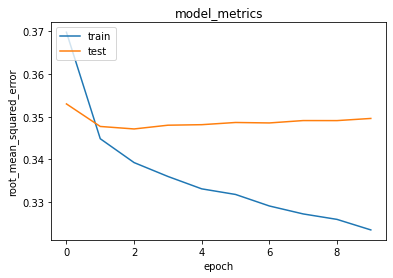

In [61]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Rekomendasi Test


In [63]:
book_dataset = books
rating_dataset = df


In [66]:
user_id = rating_dataset['User-ID'].sample(1).iloc[0]
books_have_been_read_by_user = rating_dataset[rating_dataset['User-ID'] == user_id]
 
books_have_not_been_read_by_user = book_dataset[book_dataset['ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['ISBN'] 
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)
 
books_have_not_been_read_by_user = [[isbn_to_isbn_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

In [86]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    isbn_encoded_to_isbn.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = book_dataset[book_dataset['ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row[2], ':', row[3])
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_books = book_dataset[book_dataset['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row[2], ':', row[3])


28/28 [==============================] - 0s 2ms/step
Read This and Tell Me What It Says : Stories (Bard Book) : A. Manette Ansay
Millennium Art (Postcard book, 30 detachable postcards) : Taschen America
Creatures of the Night: The Rocky Horror Experience : Sal Piro
Donde viven los monstruos : Maurice Sendak
Ten, Nine, Eight : Molly Bang
--------------------------------
Top 10 Book Recommendation for user: 78834
--------------------------------
Animal Farm : George Orwell
Captain Underpants and the Attack of the Talking Toilets: Another Epic Novel (Captain Underpants (Paper)) : Dav Pilkey
Harry Potter and the Order of the Phoenix (Book 5) : J. K. Rowling
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson : Louise Rennison
The Color Purple : Alice Walker
The Lost Boy: A Foster Child's Search for the Love of a Family : Dave Pelzer
A Light in the Attic : Shel Silverstein
Good Work, Amelia Bedelia : Peggy Parish
Cooking with Mickey &amp; Friends : More Than 30 Recipes 

Berikut adalah sistem rekomendasi dari content dan collaborative based system. Keduanya unik dan memiliki kelebihan dan kekurangannya masing - masing.